In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("website_data_export.csv")

In [7]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [8]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ["Channel Group","DateHour","Users","Sessions","Engaged Sessions", "Average engagement time per session",	"Engaged sessions per user", "Events per session", "Engagement rate","Event Count"]

In [9]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged Sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event Count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [11]:
df["DateHour"] = pd.to_datetime(df["DateHour"],format="%Y%m%d%H", errors="coerce")
numeric_col = df.columns.drop(["Channel Group","DateHour"])
df[numeric_col] = df[numeric_col].apply(pd.to_numeric,errors="coerce")
df["Hour Time"] = df["DateHour"].dt.hour

In [12]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour Time
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged Sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event Count                          3182 non-null   int64         
 10  Hour Time   

# Sessions and user overtime

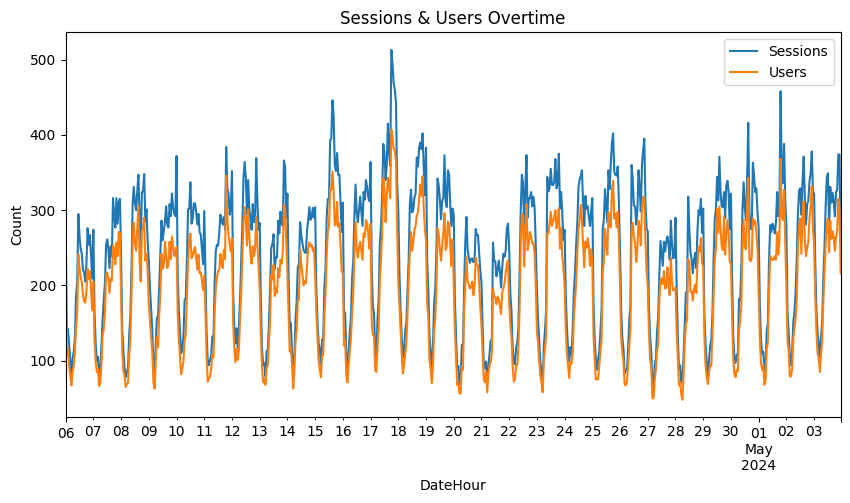

In [14]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions & Users Overtime")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# Total Users by Channel


C:\Users\266616\AppData\Local\Temp\ipykernel_38708\3632413845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum,palette="viridis")


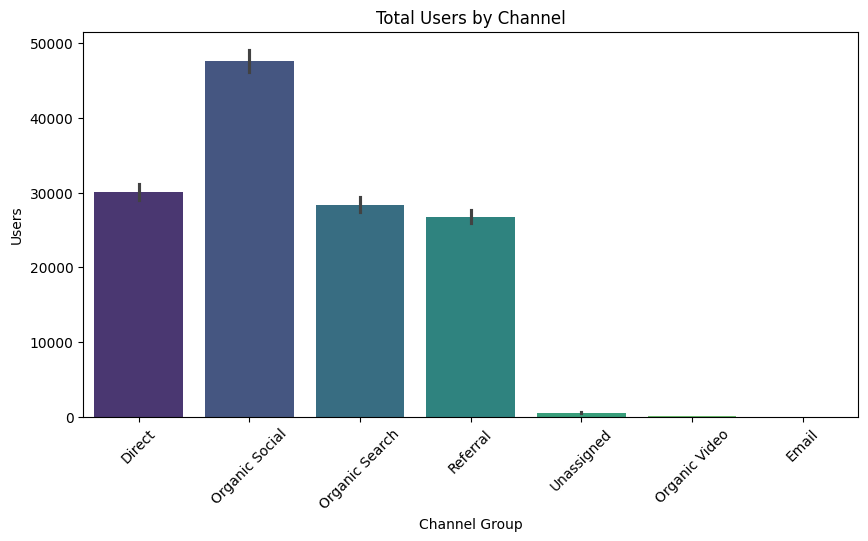

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Channel Group", y="Users", estimator=np.sum,palette="viridis")
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()


#Average Engagement time by Channel


C:\Users\266616\AppData\Local\Temp\ipykernel_38708\1417331968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Channel Group", y ="Average engagement time per session", estimator=np.mean,palette="magma")


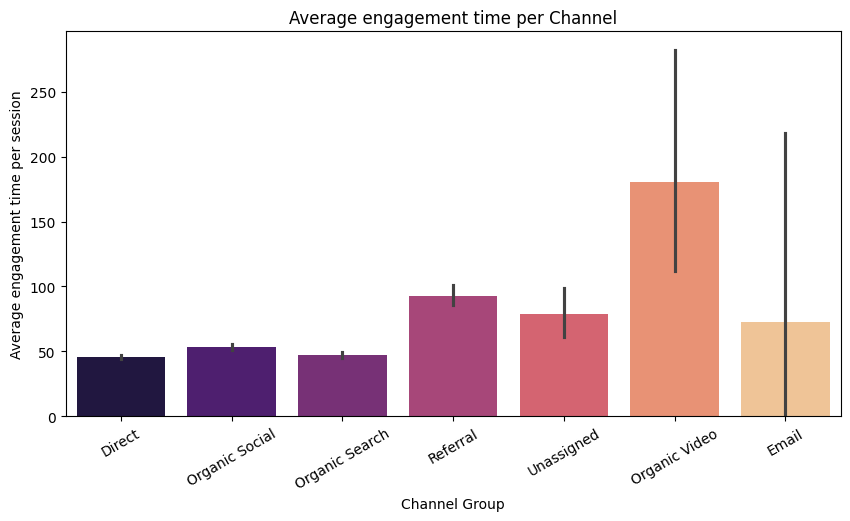

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Channel Group", y ="Average engagement time per session", estimator=np.mean,palette="magma")
plt.title("Average engagement time per Channel")
plt.xticks(rotation=30)
plt.show()

In [19]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour Time
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# Engagement Rate Distribution by Channel


C:\Users\266616\AppData\Local\Temp\ipykernel_38708\876368565.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")


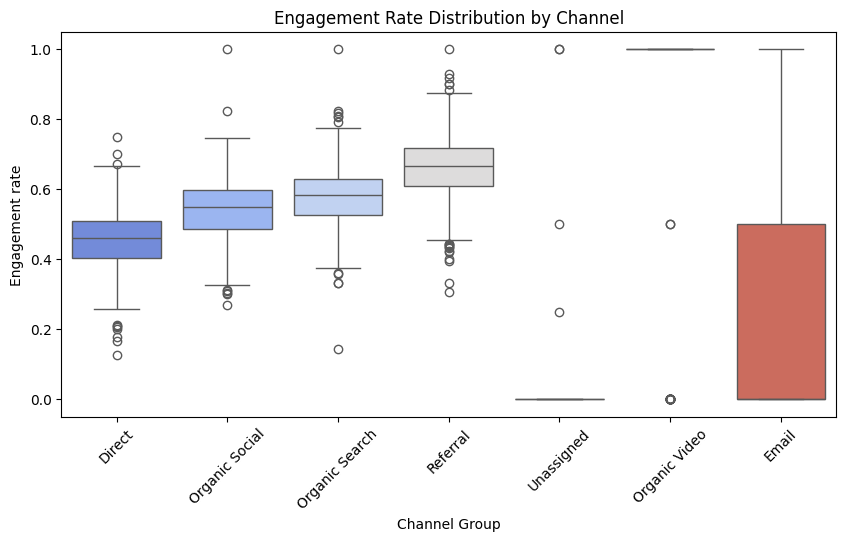

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Channel Group", y="Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()

In [24]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event Count,Hour Time
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# Engaged vs Non Engaged Sessions


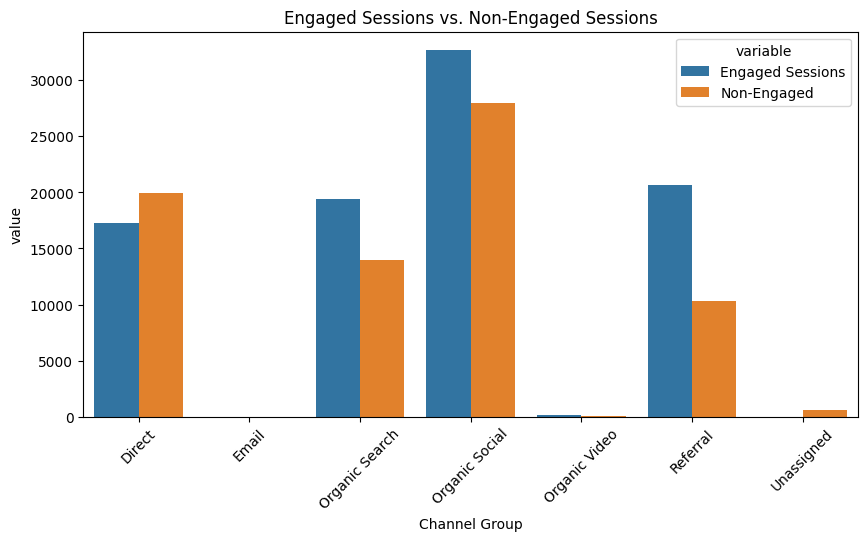

In [26]:
df_session = df.groupby("Channel Group")[["Sessions","Engaged Sessions"]].sum().reset_index()
df_session["Non-Engaged"] = df_session["Sessions"] - df_session["Engaged Sessions"]
df_session_melted = df_session.melt(id_vars="Channel Group", value_vars=["Engaged Sessions", "Non-Engaged"])

plt.figure(figsize=(10,5))
sns.barplot(data=df_session_melted, x="Channel Group", y="value", hue="variable")
plt.title("Engaged Sessions vs. Non-Engaged Sessions")
plt.xticks(rotation=45)
plt.show()

# Traffic by Hour and Channel


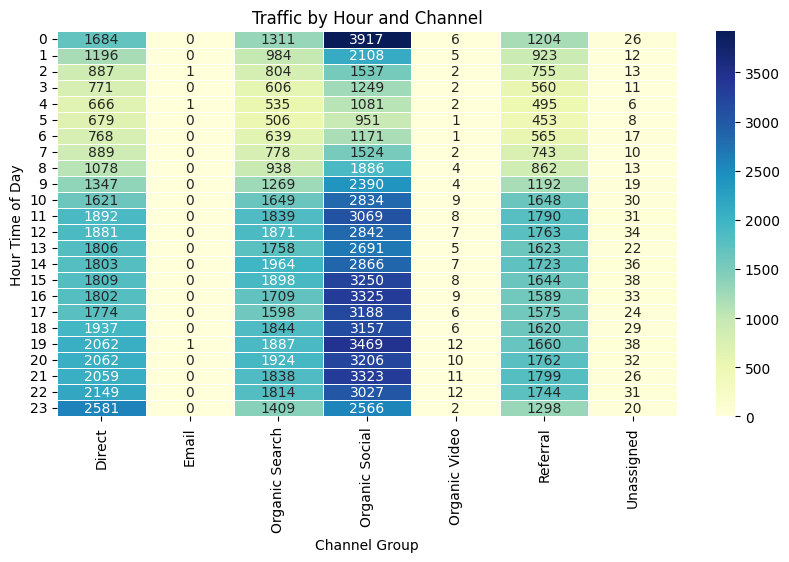

In [28]:
heatmap_data = df.groupby(["Hour Time","Channel Group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(10,5))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt=".0f")
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour Time of Day")
plt.show()

# Engagement rate vs Sessions Overtime


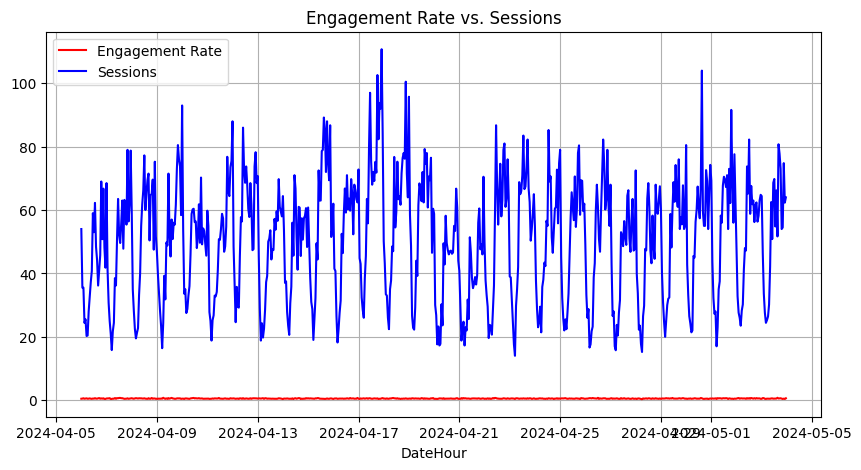

In [30]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"],df_plot["Engagement rate"], label="Engagement Rate", color="red")
plt.plot(df_plot["DateHour"],df_plot["Sessions"], label="Sessions", color="blue")
plt.title("Engagement Rate vs. Sessions")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()